2014  - Generative Adversarial Networks
2 networks competing against each other - counterfeiter and detector

Generator - generates random noise (ex: Gaussian Noise)
Discriminator - attempts to spot fake ones from real

Phase 1: Train Discriminator - labels real vs fake
Phase 2: Train Generator - produce better fake images 


  Difficulties of GANs:
    Training Resources:
        CPU takes too long
            GPUs needed
            
    Mode Collapse:
        Producing same face since it already fools discriminator - thus, we need to have multiple images
            Deep Convolutional GANs - better for avoiding mode collapse; mini-batch discrimination - punishes similar imgs
    
    Instability:
        Difficulty of not being able to ascertain model's performance since it already produces sth fake
            Playing with hyperparameters changes the performance of model   

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


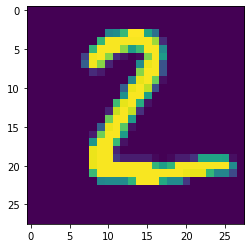

In [ ]:
plt.imshow(X_test[1])

In [ ]:
y_test[1]

2

In [ ]:
zeros = X_train[y_train==0]

In [ ]:
zeros.shape

(5923, 28, 28)

In [ ]:
X_train.shape

(60000, 28, 28)

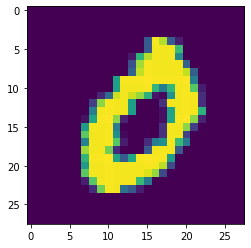

In [18]:
plt.imshow(zeros[3])

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten

In [20]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28, 28]))
discriminator.add(Dense(150, activation='relu'))
discriminator.add(Dense(100, activation='relu'))
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
# autoencoders - 784 - 150 - 100 (lowered dimensionality) -Generator-> 100 - 150 - 784
coding_size = 100
generator = Sequential()
generator.add(Dense(100, activation='relu', input_shape=[coding_size]))
generator.add(Dense(150, activation='relu'))
generator.add(Dense(784, activation='relu'))
generator.add(Reshape([28,28]))

We do not compile Generator

In [ ]:
GAN = Sequential([generator, discriminator])

In [21]:
discriminator.trainable = False
# Discriminator shoudnot be trained in 2nd phase

In [22]:
GAN.compile(loss='binary_crossentropy', optimizer='adam')

In [23]:
batch_size = 32

In [25]:
data = zeros

In [29]:
dataset = tf.data.Dataset.from_tensor_slices(data).shuffle(buffer_size=1000)

In [31]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [32]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [33]:
epochs = 1

In [37]:
GAN.layers[0].layers

In [38]:
GAN.layers[1].layers

In [40]:
GAN.layers[1].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               117750    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 132,951
Trainable params: 0
Non-trainable params: 132,951
_________________________________________________________________


In [46]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
  # print("epoch:" + epoch)
  i = 0
  for X_batch in dataset:
    i = i+1
    # if i%100 == 0:
      # print(f"\t Currently on batch {i}")    
    # Discriminator Training
    noise = tf.random.normal(shape=[batch_size, coding_size])
    gen_images = generator(noise)

    X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch, tf.float32)], axis=0)
    y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)

    discriminator.trainable = True
    discriminator.train_on_batch(X_fake_vs_real, y1)
    #Generator Training
    noise = tf.random.normal(shape=[batch_size, coding_size])
    y2 = tf.constant([[1.0]]*batch_size)
    discriminator.trainable = False
    GAN.train_on_batch(noise, y2)

In [47]:
noise = tf.random.normal(shape=[10, coding_size])

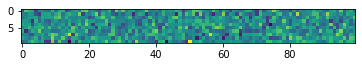

In [50]:
plt.imshow(noise)

In [51]:
images = generator(noise)

In [52]:
images.shape

TensorShape([10, 28, 28])

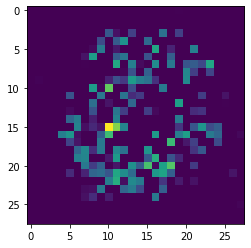

In [60]:
plt.imshow(images[3])

Mode Collapse - Generator's output becomes less diverse
Consistently produces the same image since it already fools discriminator